In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Using TensorFlow backend.


# its a data collected from bse website starting from 1 july 1998 to 13 july 2020

In [538]:
df = pd.read_csv('500040.csv')

In [539]:
df.shape

(5489, 13)

In [540]:
df.head(7)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,13-July-2020,316.50,318.00,309.00,311.50,312.205699,87482,2392,27312379.0,21877.0,25.01,9.00,-5.00
1,10-July-2020,320.00,327.55,312.95,315.60,320.337892,111740,2244,35794556.0,29008.0,25.96,14.60,-4.40
2,9-July-2020,314.80,323.15,308.95,321.35,318.009560,129815,2760,41282411.0,34350.0,26.46,14.20,6.55
3,8-July-2020,316.30,319.70,308.65,309.40,314.085418,62434,1327,19609609.0,21089.0,33.78,11.05,-6.90
4,7-July-2020,326.50,327.00,314.30,316.20,319.290464,183637,4010,58633543.0,57085.0,31.09,12.70,-10.30
5,6-July-2020,308.10,321.80,307.45,318.60,314.422413,95622,2060,30065700.0,32455.0,33.94,14.35,10.50
6,3-July-2020,299.35,311.80,298.10,305.80,306.428708,75534,1639,23145786.0,14112.0,18.68,13.70,6.45


In [541]:
df=df.iloc[::-1]

In [542]:
df.head(7)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
5488,1-July-1998,42.25,42.25,39.20,39.20,39.424719,165380,651,6520060.0,NaN,NaN,3.05,-3.05
5487,2-July-1998,36.70,39.10,36.55,37.90,38.332534,64210,383,2461332.0,NaN,NaN,2.55,1.20
5486,3-July-1998,37.20,37.60,35.30,36.15,35.932710,232650,633,8359745.0,NaN,NaN,2.30,-1.05
5485,6-July-1998,37.50,38.00,37.10,37.40,37.503305,40850,230,1532010.0,NaN,NaN,0.90,-0.10
5484,7-July-1998,37.50,40.35,37.35,40.35,39.226003,109720,390,4303877.0,NaN,NaN,3.00,2.85
5483,8-July-1998,41.50,42.25,40.25,40.80,41.043616,75660,335,3105360.0,NaN,NaN,2.00,-0.70
5482,9-July-1998,41.00,41.40,39.35,39.95,40.477906,45850,261,1855912.0,NaN,NaN,2.05,-1.05


In [543]:
df.reset_index(drop=True,inplace=True)

In [544]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-July-1998,42.25,42.25,39.20,39.20,39.424719,165380,651,6520060.0,NaN,NaN,3.05,-3.05
1,2-July-1998,36.70,39.10,36.55,37.90,38.332534,64210,383,2461332.0,NaN,NaN,2.55,1.20
2,3-July-1998,37.20,37.60,35.30,36.15,35.932710,232650,633,8359745.0,NaN,NaN,2.30,-1.05
3,6-July-1998,37.50,38.00,37.10,37.40,37.503305,40850,230,1532010.0,NaN,NaN,0.90,-0.10
4,7-July-1998,37.50,40.35,37.35,40.35,39.226003,109720,390,4303877.0,NaN,NaN,3.00,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,7-July-2020,326.50,327.00,314.30,316.20,319.290464,183637,4010,58633543.0,57085.0,31.09,12.70,-10.30
5485,8-July-2020,316.30,319.70,308.65,309.40,314.085418,62434,1327,19609609.0,21089.0,33.78,11.05,-6.90
5486,9-July-2020,314.80,323.15,308.95,321.35,318.009560,129815,2760,41282411.0,34350.0,26.46,14.20,6.55
5487,10-July-2020,320.00,327.55,312.95,315.60,320.337892,111740,2244,35794556.0,29008.0,25.96,14.60,-4.40


In [545]:
df.head(7)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-July-1998,42.25,42.25,39.20,39.20,39.424719,165380,651,6520060.0,NaN,NaN,3.05,-3.05
1,2-July-1998,36.70,39.10,36.55,37.90,38.332534,64210,383,2461332.0,NaN,NaN,2.55,1.20
2,3-July-1998,37.20,37.60,35.30,36.15,35.932710,232650,633,8359745.0,NaN,NaN,2.30,-1.05
3,6-July-1998,37.50,38.00,37.10,37.40,37.503305,40850,230,1532010.0,NaN,NaN,0.90,-0.10
4,7-July-1998,37.50,40.35,37.35,40.35,39.226003,109720,390,4303877.0,NaN,NaN,3.00,2.85
5,8-July-1998,41.50,42.25,40.25,40.80,41.043616,75660,335,3105360.0,NaN,NaN,2.00,-0.70
6,9-July-1998,41.00,41.40,39.35,39.95,40.477906,45850,261,1855912.0,NaN,NaN,2.05,-1.05


In [546]:
df.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 13 columns):
Date                         5489 non-null object
Open Price                   5489 non-null float64
High Price                   5489 non-null float64
Low Price                    5489 non-null float64
Close Price                  5489 non-null float64
WAP                          5489 non-null float64
No.of Shares                 5489 non-null int64
No. of Trades                5489 non-null int64
Total Turnover (Rs.)         5489 non-null float64
Deliverable Quantity         4569 non-null float64
% Deli. Qty to Traded Qty    4569 non-null float64
Spread High-Low              5489 non-null float64
Spread Close-Open            5489 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 557.6+ KB


In [548]:
df.shape

(5489, 13)

In [549]:
df.drop(columns=['Deliverable Quantity','% Deli. Qty to Traded Qty','Date'],inplace=True)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 10 columns):
Open Price              5489 non-null float64
High Price              5489 non-null float64
Low Price               5489 non-null float64
Close Price             5489 non-null float64
WAP                     5489 non-null float64
No.of Shares            5489 non-null int64
No. of Trades           5489 non-null int64
Total Turnover (Rs.)    5489 non-null float64
Spread High-Low         5489 non-null float64
Spread Close-Open       5489 non-null float64
dtypes: float64(8), int64(2)
memory usage: 429.0 KB


# making y_train from dataset

In [564]:
dataset=df.values

In [565]:
dataset.shape

(5489, 10)

In [566]:
# here 3 column is the closing price of the stock which we have to predict
dataset[1][3]

37.9

In [555]:
len(dataset)

5489

In [567]:
y_train=[]

for i in range(60,len(dataset)):
    y_train.append(dataset[i,3])
    


In [571]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
print(y_train.shape)

(5429, 1)


## scaling the data

In [559]:
a=np.array([0,1,2])
a=a.reshape((1,-1))
a

array([[0, 1, 2]])

In [560]:
a.shape

(1, 3)

In [561]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(a)
print(scaled_data)

[[0. 0. 0.]]


In [562]:
pre=scaler.inverse_transform(scaled_data)
print(pre)

[[0. 1. 2.]]


In [572]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))
scaled_data_x=scaler_x.fit_transform(dataset)
scaled_data_y=scaler_y.fit_transform(y_train)

In [573]:
print(scaled_data_x.shape,scaled_data_y.shape)

(5489, 10) (5429, 1)


## making x_train for our dataset

### we have not taken last value in this check loop you will get that last is missed in this loop but it is present in y value

In [574]:
len(scaled_data_x)

5489

In [575]:
x_train=[]

for i in range(60,len(scaled_data_x)):
    x_train.append(scaled_data_x[i-60:i,:])

In [576]:
x_train=np.array(x_train)
print(x_train.shape)

(5429, 60, 10)


In [577]:
scaled_data_y.shape

(5429, 1)

In [579]:
scaled_data_y=scaled_data_y.reshape((-1,))

In [580]:
scaled_data_y.shape

(5429,)

## making test data for tomorrow prediction

In [581]:
test_val=scaled_data_x[-60:,:]

In [582]:
test_val

array([[0.22303665, 0.2253064 , 0.22149433, 0.22821025, 0.22094612,
        0.05454489, 0.03520194, 0.03751984, 0.05804598, 0.69765013],
       [0.23560209, 0.23228034, 0.21515581, 0.21430823, 0.2241653 ,
        0.04660313, 0.03485563, 0.03249264, 0.13103448, 0.56588338],
       [0.21082024, 0.207768  , 0.20325779, 0.20180691, 0.20366679,
        0.0097791 , 0.01248431, 0.00623623, 0.05938697, 0.62732811],
       [0.19581152, 0.19765234, 0.18279037, 0.18370277, 0.18511032,
        0.14427476, 0.11593438, 0.08422764, 0.11398467, 0.61218451],
       [0.18750436, 0.19292249, 0.18711048, 0.19172182, 0.19220042,
        0.08107113, 0.05495866, 0.04899868, 0.06436782, 0.69347258],
       [0.1886911 , 0.18960815, 0.18427762, 0.18338761, 0.18547537,
        0.0449241 , 0.02811134, 0.02627446, 0.06130268, 0.64612707],
       [0.19092496, 0.18808907, 0.18661473, 0.1857338 , 0.18614656,
        0.015359  , 0.01804251, 0.00901299, 0.04022989, 0.64664926],
       [0.1877836 , 0.18677714, 0.1839943

In [583]:
test_val.shape

(60, 10)

In [584]:
test_val=test_val.reshape((1,test_val.shape[0],test_val.shape[1]))

In [585]:
test_val.shape

(1, 60, 10)

### this is the method to shuffle the data

In [586]:
import random

In [499]:
a=np.arange(27).reshape((3,3,3))
b=np.array([9,8,7])

In [500]:
print(a," \n\n", b)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]  

 [9 8 7]


In [501]:
print(a.shape,b.shape)

(3, 3, 3) (3,)


In [502]:
combined =list(zip(a,b))

In [503]:
for c in combined:
    print(c)

(array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]), 9)
(array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]]), 8)
(array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]]), 7)


In [504]:
random.shuffle(combined)

In [505]:
combined

[(array([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]), 9), (array([[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]), 7), (array([[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]), 8)]

In [506]:
a,b[:]=zip(*combined)

In [507]:
print(a,"\n\n\n",b)

(array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]), array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]]), array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])) 


 [9 7 8]


In [508]:
a=np.array(a)

In [509]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

## shuffling our data

In [587]:
combined=list(zip(x_train,scaled_data_y))

In [588]:
random.shuffle(combined)

In [589]:
x_train_shuffled,y_train_shuffled=zip(*combined)

In [590]:
x_train_shuffled=np.array(x_train_shuffled)

In [591]:
x_train_shuffled.shape

(5429, 60, 10)

In [592]:
y_train_shuffled=np.array(y_train_shuffled)

In [594]:
y_train_shuffled.shape

(5429,)

## making our lstm model

In [661]:
from keras.layers import Dropout

In [662]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 60, 128)           71168     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)               

In [663]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [664]:
print(x_train_shuffled.shape,y_train_shuffled.shape)

(5429, 60, 10) (5429,)


In [665]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.h5",monitor='val_loss',mode='auto',verbose=0,save_best_only=True,period=1)

hist=model.fit(x_train_shuffled,y_train_shuffled,validation_split=0.2,epochs=10,batch_size=64,callbacks=[checkpoint])

Train on 4343 samples, validate on 1086 samples
Epoch 1/10
4343/4343 [==============================] - 50s 11ms/step - loss: 0.0064 - mae: 0.0479 - val_loss: 8.9449e-04 - val_mae: 0.0184
Epoch 2/10
4343/4343 [==============================] - 43s 10ms/step - loss: 0.0017 - mae: 0.0271 - val_loss: 7.7147e-04 - val_mae: 0.0163
Epoch 3/10
4343/4343 [==============================] - 48s 11ms/step - loss: 0.0017 - mae: 0.0264 - val_loss: 0.0011 - val_mae: 0.0242
Epoch 4/10
4343/4343 [==============================] - 43s 10ms/step - loss: 0.0017 - mae: 0.0272 - val_loss: 0.0010 - val_mae: 0.0206
Epoch 5/10
4343/4343 [==============================] - 45s 10ms/step - loss: 0.0016 - mae: 0.0255 - val_loss: 7.8211e-04 - val_mae: 0.0181
Epoch 6/10
4343/4343 [==============================] - 44s 10ms/step - loss: 0.0018 - mae: 0.0277 - val_loss: 5.6193e-04 - val_mae: 0.0139
Epoch 7/10
4343/4343 [==============================] - 46s 11ms/step - loss: 0.0013 - mae: 0.0234 - val_loss: 5.9286e-0

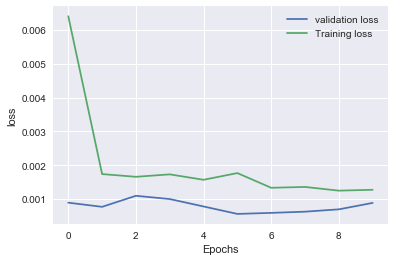

In [666]:
h=hist.history
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

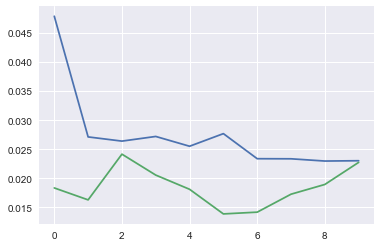

In [667]:
plt.plot(h['mae'])
plt.plot(h['val_mae'])
plt.show()

In [668]:
model.load_weights("best_model.h5")

In [669]:
test_val.shape

(1, 60, 10)

In [670]:
y_predicted=model.predict(test_val)

In [671]:
y_predicted

array([[0.20141771]], dtype=float32)

In [672]:
actual=scaler_y.inverse_transform(y_predicted)

In [673]:
actual

array([[310.0943]], dtype=float32)

# not working as 14 july 2020 closing price is 300